In [1]:
import pandas as pd

In [2]:
df = pd.read_excel(r'C:\Users\maayu\Documents\Raw Data.xlsx')

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom


In [7]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [ ]:
# Fix Data Types (InvoiceDate)

In [8]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"],errors = "coerce")

In [11]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [ ]:
# Fix Data Type (CustumerId)

In [9]:
df["CustomerID"] = df["CustomerID"].astype("Int64").astype("string")

In [13]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID     string[python]
Country                object
dtype: object

In [ ]:
# Removing Cancelled Orderes from Invoice

In [10]:
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

In [15]:
df['InvoiceNo'].str.startswith('C').sum()

0

In [ ]:
# Removing NegetiveInteger from quantity

In [16]:
df = df[df["Quantity"]>0]

In [23]:
# Removing Duplicates

In [17]:
df.duplicated().sum()

np.int64(5231)

In [18]:
df = df.drop_duplicates()

In [19]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# Handeling Missing Custumer id

In [20]:
df['CustomerID'].isna().sum()

np.int64(133322)

In [ ]:
# Creating Revenue Column for KPI (Quantity*UnitPrice)

In [11]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [12]:
df[['Quantity', 'UnitPrice', 'Revenue']].head()

,Quantity,UnitPrice,Revenue
0,6,2.55,15.30
1,6,3.39,20.34
2,8,2.75,22.00
3,6,3.39,20.34
4,6,3.39,20.34


In [ ]:
# Cleaning Description Column

In [13]:
df['Description'] = df['Description'].astype(str).str.strip().str.lower()

In [14]:
df['Description'].head(10)

0     white hanging heart t-light holder
1                    white metal lantern
2         cream cupid hearts coat hanger
3    knitted union flag hot water bottle
4         red woolly hottie white heart.
5           set 7 babushka nesting boxes
6      glass star frosted t-light holder
7                 hand warmer union jack
8              hand warmer red polka dot
9          assorted colour bird ornament
Name: Description, dtype: object

In [25]:
(df['Description'].str.match(r'^\s')).sum()

np.int64(0)

In [26]:
(df['Description'].str.match(r'.*\s$')).sum()

np.int64(0)

In [36]:
# Checking Everything beofre analisis

In [27]:
df.shape

(526054, 9)

In [28]:
df["CustomerID"].nunique()

4339

In [29]:
df['StockCode'].nunique()


3941

In [41]:
# Calculating KPI

In [15]:

total_revenue = df["Revenue"].sum()
total_revenue

np.float64(10644560.424000002)

In [16]:

total_orders = df["InvoiceNo"].nunique()
total_orders

22064

In [17]:
total_customers = df["CustomerID"].nunique()
total_customers

4339

In [18]:
aov = total_revenue/total_orders
aov

np.float64(482.4401932559827)

In [19]:
total_quantity = df["Quantity"].sum()
total_quantity

np.int64(5454024)

In [ ]:
# Performing EDA for Monthly Sales Trend

In [20]:
df["Month"] = df["InvoiceDate"].dt.to_period("M")

In [21]:
df["Month"].head()

0    2010-01
1    2010-01
2    2010-01
3    2010-01
4    2010-01
Name: Month, dtype: period[M]

In [22]:

monthly_revenue = df.groupby("Month")["Revenue"].sum().reset_index()
monthly_revenue

,Month,Revenue
0,2010-01,58960.790
1,2010-02,47748.380
2,2010-03,46943.710
3,2010-05,31774.950
4,2010-06,54830.460
5,2010-07,99618.200
6,2010-08,45389.980
7,2010-09,53586.180
8,2010-10,59182.920
9,2010-12,325710.570


In [58]:
# Plotting the monthly sales trend

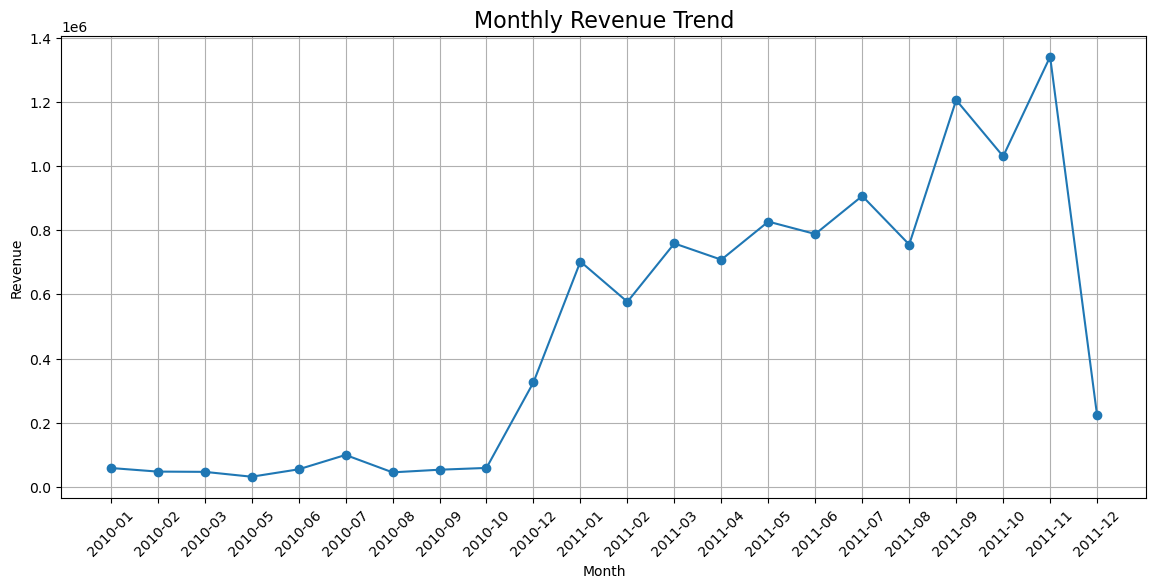

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(monthly_revenue['Month'].astype(str), monthly_revenue['Revenue'], marker='o')
plt.title('Monthly Revenue Trend', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [24]:
top_products = (
    df.groupby('Description')['Revenue']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_products

Description
dotcom postage                        206248.77
regency cakestand 3 tier              174484.74
paper craft , little birdie           168469.60
white hanging heart t-light holder    106292.77
party bunting                          99504.33
jumbo bag red retrospot                94340.05
medium ceramic top storage jar         81700.92
manual                                 78112.82
postage                                78101.88
rabbit night light                     66964.99
Name: Revenue, dtype: float64

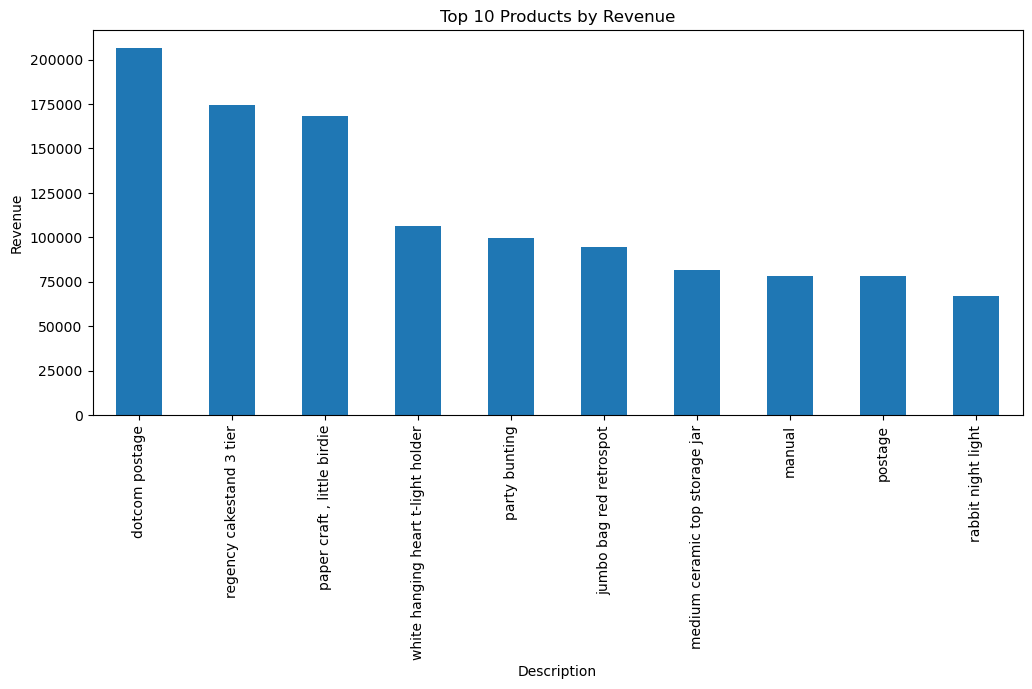

In [25]:
top_products.plot(kind='bar', figsize=(12,5))
plt.title("Top 10 Products by Revenue")
plt.ylabel("Revenue")
plt.show()

In [26]:
country_revenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).head(10)
country_revenue

Country
United Kingdom    9003097.964
Netherlands        285446.340
EIRE               283453.960
Germany            228867.140
France             209715.110
Australia          138521.310
Spain               61577.110
Switzerland         57089.900
Belgium             41196.340
Sweden              38378.330
Name: Revenue, dtype: float64

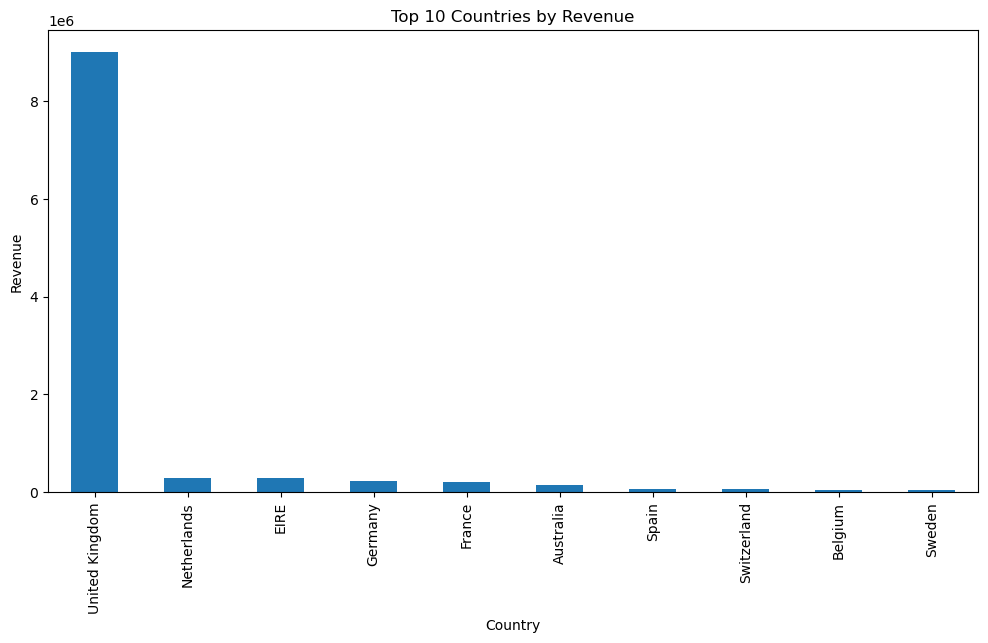

In [27]:
country_revenue.plot(kind='bar', figsize=(12,6))
plt.title("Top 10 Countries by Revenue")
plt.ylabel("Revenue")
plt.show()

In [28]:
df_rfm = df[df['CustomerID'].notna()]

In [54]:
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
snapshot_date

Timestamp('2011-12-11 17:19:00')

In [55]:
df_rfm['InvoiceDate'].dtype

dtype('O')

In [29]:
df_rfm.loc[:, 'InvoiceDate'] = pd.to_datetime(df_rfm['InvoiceDate'], errors='coerce')

In [30]:
snapshot_date = df_rfm['InvoiceDate'].max() + pd.Timedelta(days=1)
snapshot_date

Timestamp('2011-12-11 17:19:00')

In [ ]:
# RFM Step 3 — Calculate Recency, Frequency, Monetary

In [31]:
rfm = df_rfm.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'Revenue': 'sum'
})

In [32]:
rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'Revenue': 'Monetary'
}, inplace=True)

In [33]:
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,327,1,77183.60
12347,41,7,4310.00
12348,77,4,1797.24
12349,20,1,1757.55
12350,312,1,334.40


In [ ]:
# Assign RFM Scores

In [39]:
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])

In [40]:
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])

In [41]:
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])

In [67]:
# Combine RFM score

In [42]:
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

In [43]:
rfm.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
CustomerID,,,,,,,
12346,327,1,77183.60,1,1,5,115
12347,41,7,4310.00,4,5,5,455
12348,77,4,1797.24,3,4,4,344
12349,20,1,1757.55,4,1,4,414
12350,312,1,334.40,1,1,2,112


In [1]:
# segmentation column

In [44]:
def segment_customer(row):
    r, f, m = int(row['R_Score']), int(row['F_Score']), int(row['M_Score'])
    
    if r >= 4 and f >= 4 and m >= 4:
        return 'Champion'
    elif r >= 4 and f >= 3:
        return 'Loyal Customer'
    elif r == 5 and f <= 2:
        return 'Recent Customer'
    elif r >= 3 and f >= 3:
        return 'Potential Loyalist'
    elif r <= 2 and f >= 3:
        return 'At Risk'
    elif r <= 2 and f <= 2:
        return 'Hibernating / Lost'
    else:
        return 'Others'

rfm['Segment'] = rfm.apply(segment_customer, axis=1)
rfm[['Recency','Frequency','Monetary','RFM_Score','Segment']].head()

,Recency,Frequency,Monetary,RFM_Score,Segment
CustomerID,,,,,
12346,327,1,77183.60,115,Hibernating / Lost
12347,41,7,4310.00,455,Champion
12348,77,4,1797.24,344,Potential Loyalist
12349,20,1,1757.55,414,Others
12350,312,1,334.40,112,Hibernating / Lost


In [45]:
# counting each segment

In [46]:
segment_counts = rfm['Segment'].value_counts()
segment_counts

Segment
Hibernating / Lost    1069
Champion               950
At Risk                656
Others                 544
Potential Loyalist     517
Loyal Customer         480
Recent Customer        123
Name: count, dtype: int64

In [47]:
# Creatin the RFM Segmentation Pie Chart

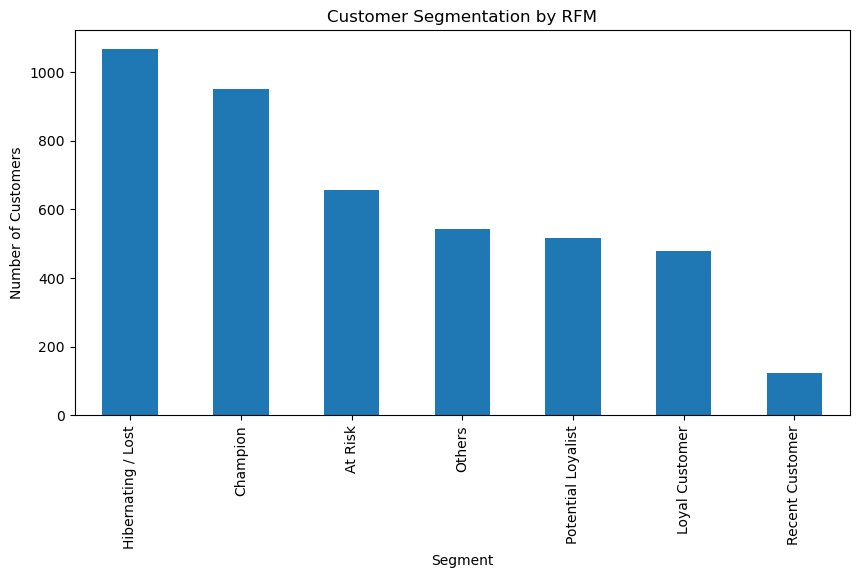

In [52]:
segment_counts.plot(kind='bar', figsize=(10,5))
plt.title("Customer Segmentation by RFM")
plt.ylabel("Number of Customers")
plt.show()

In [53]:
df.to_csv("cleaned_ecommerce_data.csv", index=False)

In [57]:
df.to_excel("cleaned_ecommerce_data.xlsx", index=False)

In [58]:
rfm.to_csv("rfm_segments.csv", index=True)

In [59]:
rfm.to_csv("rfm_segments.csv", index=True, encoding="utf-8-sig")

In [60]:
rfm.to_csv("rfm_segments_no_index.csv", index=False, encoding="utf-8-sig")

In [61]:
rfm.to_excel("rfm_segments.xlsx", index=True)